# Exploring Feature Types

In this notebook we will be using Titanic dataset containing 891 records of passengers on board and 12 features such as their age, travel class and the ticket's fare. One step at a time we'll inspect continuous and categorical feature types with the help of visualizations. 

Firstly, we import necessary libraries and load the data using Pandas.

In [1]:
# Importing Pandas, Matplotlib and Seaborn libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")

In [3]:
# Load the dataset 'Data/titanic_data.csv' and store it to variable data
data = pd.read_csv('Data/titanic_data.csv')

# Get first 10 rows of the data
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Take a look at the first ten rows and read through the explanation below to understand what each feature represents.

- passengerID
- Name
- Sex
- Age
- Survived - not survived = 0, survived = 1, (target feature)
- Pclass - ticket class = 1st, 2nd, 3rd
- SibSp - number of siblings or spouses aboard the Titanic
- Parch - number of parents or children aboard the Titanic
- Ticket - ticket number
- Fare - ticket fare
- Cabin - cabin number
- Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

# 1. Numerical Features

## 1.1 Unbounded continuous type
One of the numerical feature is 'Fare' representing the price that a passenger paid for the ticket. The price starts at zero and continuously increases within a specific range. This is the example of unbounded continuous feature type because the number can takes any value including decimal numbers with a fractional part. 

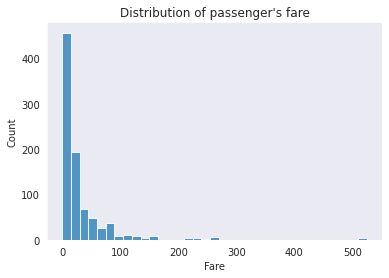

In [4]:
# Creating a histogram of 'Fare' 
sns.histplot(data = data, x = 'Fare', binwidth = 15)
plt.title("Distribution of passenger's fare");

The next numerical continuous feature is 'Age'. The other characteristic of a continuous feature is that it can be measured, as we can measure the age in years, for example. Let's create a boxplot to see its distribution. 

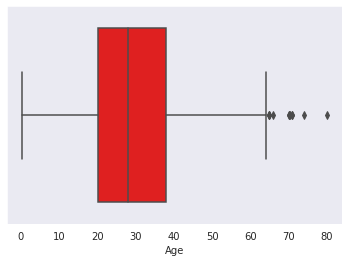

In [5]:
# Creating a boxplot of 'Age'
sns.boxplot(data=data, x = 'Age',color ='r');

## 1.2 Unbounded discrete type

The feature 'SibSp' represents family relations as siblings or spouses. We can treat this feature as _discrete_ since the number is always some "isolated" value - logically, you can't report that you have 2.5 sisters.

When we call `value_counts()` function on the 'SibSp' column, we get all of the unique values along with corresponding counts. 

In [6]:
# Get the counts of unique values of 'SibSp'
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

When we visualize such a discrete feature, let's say with a countplot, each bar represents a unique integer value with respective count of records. There is no overlapping between these fixed values because they are counted, not measured.

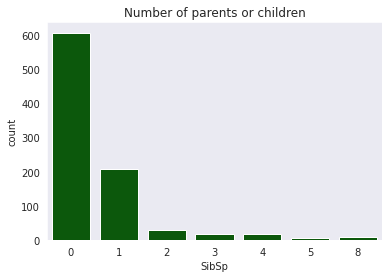

In [7]:
# Creating a countplot of 'SibSp'
sns.countplot(data = data, x = 'SibSp', color = 'darkgreen')
plt.title('Number of parents or children');

# 2. Categorical Features

Categorical features contain a set of distinct categories (also called _labels_), while each category can takes only one limited and fixed value. As you saw in the preceding lesson, categorical features are divided into two 'subtypes' based on whether their values have order or not. 

## 2.1 Ordinal categorical features

Let's take as an example 'Pclass' feature that holds information on the ticket class each passenger paid for: 1st, 2nd or 3rd class. These travel classes reflect socioeconomic status of the passengers aboard. They have the specific order and can be related to the target feature. Were the wealthiest passengers travelling in the first class more likely to survive? Or is class of no importance in terms of survival? 

Ordinal categorical features can be either numeric values or labels. Still, it would be nice to keep the information about order of values and present it to the predictive model. This would be the additional information that can make the model's predictions better.




In [8]:
# Get the counts of unique values of 'Pclass'
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

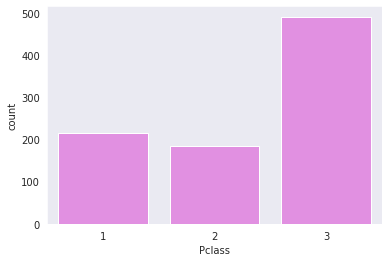

In [9]:
# Creating a countplot of 'Pclass'
sns.countplot(data = data, x = 'Pclass', color = 'violet');

## 2.2 Non-ordinal categorical features
The second 'subtype' of categorical features are non-ordinal features. Let's take as an example the feature 'Embarked'. It contains information about port of embarkation, namely Cherbourg, Queenstown and Southampton. So these are specific categories without any order or relationship among them.

In [10]:
# Get the categories of 'Embarked' 
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

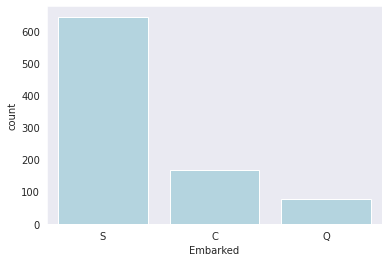

In [11]:
# Creating a countplot of 'Embarked'
sns.countplot(data = data, x = 'Embarked', color = 'lightblue');

## 2.3 Binary categorical features

Binary categorical features are a special type of categorical features which take only 2 values. For example, the 'Survived' feature in our dataset contains just 2 values: 0 and 1.

In [12]:
# Get the unique values of 'Survived' column
data['Survived'].unique()

array([0, 1])

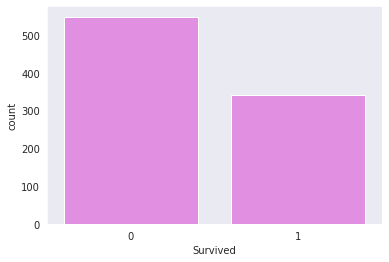

In [13]:
# Creating a countplot of 'Survived' 
sns.countplot(data = data, x = 'Survived', color = 'violet');

# Appendix

Data source: https://www.kaggle.com/hesh97/titanicdataset-traincsv

Data license: CC0: Public Domain

Material adapted for RBI internal purposes with full permissions from original authors. [Source](https://github.com/zatkopatrik/authentic-data-science) 